## 1.4.10 Histograms in OpenCV


In [1]:
import numpy as np
import cv2

In [2]:
img = cv2.imread('sky.jpg',0) 
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [9]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
print(np.transpose(hist))

[   0    2    3    6   12   23   51   65   94   81   92   72   75   73
   56   55   51   41   41   43   47   50   35   17   26   22   21   20
   26   16   22   20   18   24   20   20   19   35   22   27   24   38
   51   72   83  144  137  108   99  131  150  130  168  156  189  214
  260  258  264  262  262  264  331  298  295  321  312  315  356  430
  464  477  516  538  504  531  508  636  695  633  585  589  500  528
  477  532  542  573  588  555  555  566  583  577  527  494  369  361
  375  363  342  349  312  291  279  265  273  252  207  207  199  204
  198  226  224  196  231  201  216  223  272  228  221  222  194  184
  194  179  182  165  182  182  186  181  178  207  194  235  242  197
  242  234  253  275  248  257  262  284  303  297  315  347  328  374
  349  373  459  506  514  450  412  441  450  447  494  512  537  540
  621  546  549  598  562  571  565  587  620  614  561  613  582  580
  596  619  613  608  602  566  584  593  645  672  623  584  509  528
  521 

In [5]:
hist = np.bincount(img.ravel(),minlength=256)

In [6]:
from matplotlib import pyplot as plt

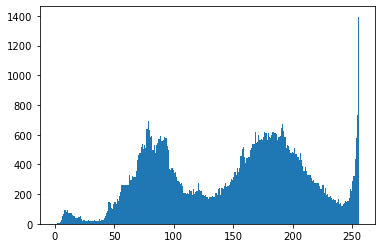

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

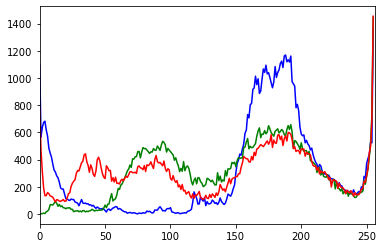

In [12]:
img = cv2.imread('sky.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

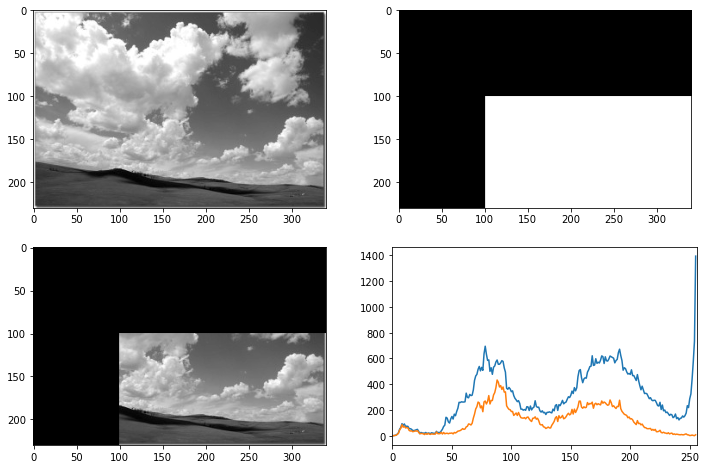

In [13]:
img = cv2.imread('sky.jpg',0)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

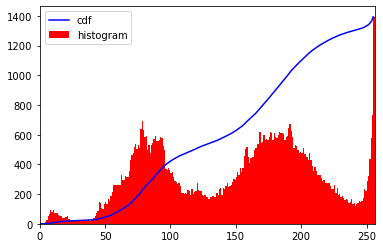

In [14]:
img = cv2.imread('sky.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum() 
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256]) 
plt.legend(('cdf','histogram'), loc = 'upper left') 
plt.show()


In [15]:
cdf_m = np.ma.masked_equal(cdf,0) 
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()) 
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [16]:
img2 = cdf[img]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x28e0ea24c10>)

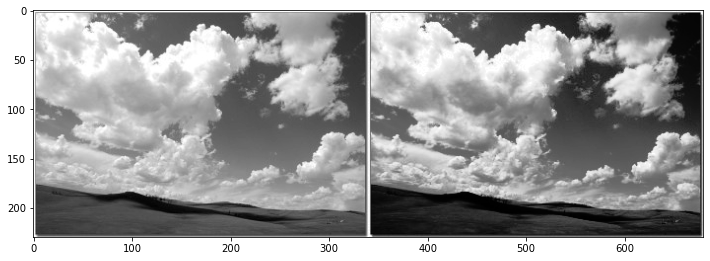

In [20]:
img = cv2.imread('sky.jpg',0) 
equ = cv2.equalizeHist(img) 
res = np.hstack((img,equ))
cv2.imwrite('res.png',res)
plt.figure(figsize=(12,8))
plt.subplot(111), plt.imshow(res, 'gray')